# GeoData

This notebook requires geopandas. Please make sure you're in the correct environment.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx

### Bring in cleaned data

In [40]:
dc_2010 = pd.read_csv('../output_data/data_2010_dc_cleaned.csv', index_col=0)
dc_2019 = pd.read_csv('../output_data/data_2019_dc_cleaned.csv', index_col=0)
dc_2010_halfand10 = pd.read_csv('../output_data/data_2010_dc_halfand10_cleaned.csv', index_col=0)
dc_2019_1and10 = pd.read_csv('../output_data/data_2019_dc_1and10_cleaned.csv', index_col=0)
dc_shape_2019 = gpd.read_file('../datasets/original_data_files/tl_2019_11_tract/tl_2019_11_tract.shp', index_col=0)
dc_shape_2010 = gpd.read_file('../datasets/original_data_files/tl_2010_11_tract10/tl_2010_11_tract10.shp', index_col=0)

In [87]:
dc_2010['censustract'] = dc_2010['censustract'].astype(str)
dc_2019['censustract'] = dc_2019['censustract'].astype(str)
dc_shape_2010['GEOID10'] = dc_shape_2010['GEOID10'].astype(str)
dc_shape_2019['GEOID'] = dc_shape_2019['GEOID'].astype(str)
dc_2019_1and10['censustract'] = dc_2019_1and10['censustract'].astype(str)

In [89]:
dc_all_2010 = pd.merge(dc_shape_2010, dc_2010, left_on='GEOID10', right_on='censustract')
dc_all_2019 = pd.merge(dc_shape_2019, dc_2019, left_on='GEOID', right_on='censustract')
dc_all_2019_1and10 = pd.merge(dc_shape_2019, dc_2019_1and10, left_on='GEOID', right_on='censustract')

----

Maps to visualize difference in food deserts between 2010 and 2019, using both `halfand10` and `1and10` features.

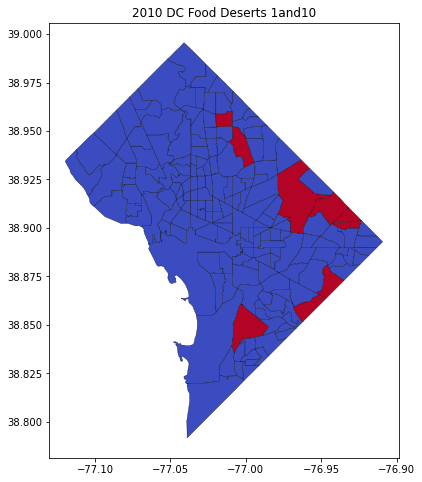

In [9]:
dc_all_2010.plot(
    figsize=(8,8),
    column="lilatracts_1and10",
    cmap='coolwarm',
    edgecolor='black', 
    linewidth = 0.3,
);
plt.title('2010 DC Food Deserts 1and10');

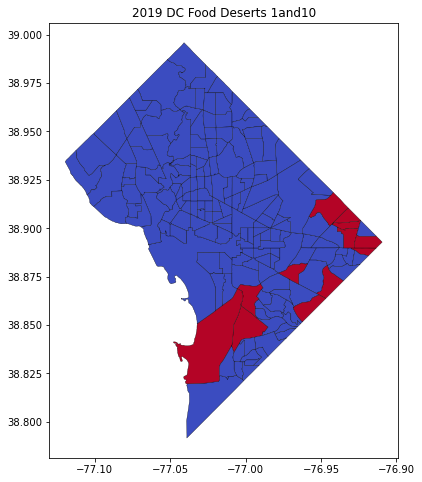

In [10]:
dc_all_2019.plot(
    figsize=(8,8),
    column="lilatracts_1and10",
    cmap='coolwarm',
    edgecolor='black', 
    linewidth = 0.3,
);
plt.title('2019 DC Food Deserts 1and10');

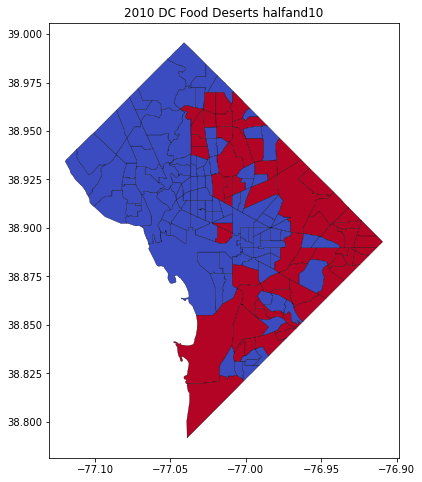

In [11]:
dc_all_2010.plot(
    figsize=(8,8),
    column="lilatracts_halfand10",
    cmap='coolwarm',
    edgecolor='black', 
    linewidth = 0.3,
);
plt.title('2010 DC Food Deserts halfand10');

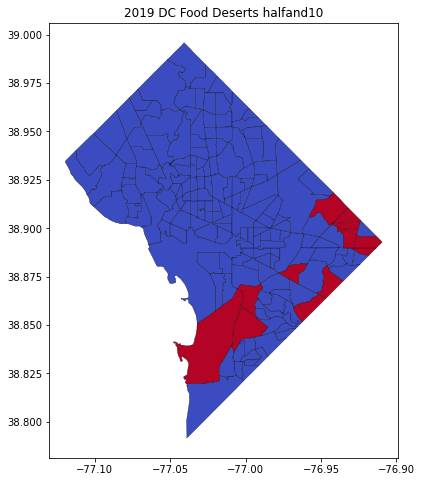

In [12]:
dc_all_2019.plot(
    figsize=(8,8),
    column="lilatracts_1and10",
    cmap='coolwarm',
    edgecolor='black', 
    linewidth = 0.3,
);
plt.title('2019 DC Food Deserts halfand10');

Map Images Presented in Slide 7

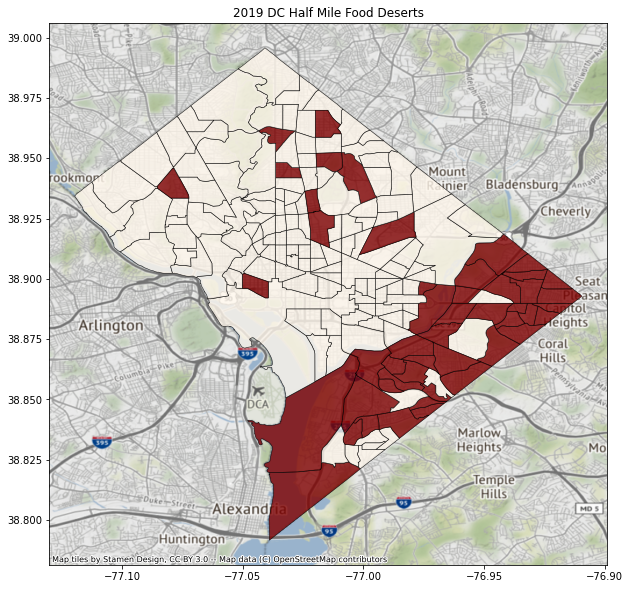

In [18]:
# 1/2 mile DC map - Slide 7
half_mile = dc_all_2019.plot(
    figsize=(10, 10),
    alpha=0.8,
    column="lilatracts_halfand10",
    cmap='OrRd',
    edgecolor='black', 
    linewidth = 0.6,
)
plt.title('2019 DC Half Mile Food Deserts')
cx.add_basemap(half_mile, crs = dc_all_2019.crs);

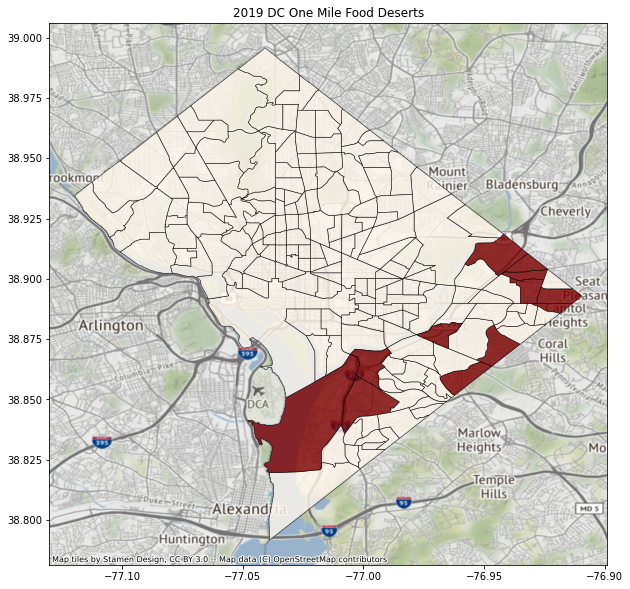

In [19]:
# 1 mile DC map - Slide 7
one_mile = dc_all_2019.plot(
    figsize=(10, 10),
    alpha=0.8,
    column="lilatracts_1and10",
    cmap='OrRd',
    edgecolor='black', 
    linewidth = 0.6,
)
plt.title('2019 DC One Mile Food Deserts')
cx.add_basemap(one_mile, crs = dc_all_2019.crs);

Map Images Presented in Slide 8

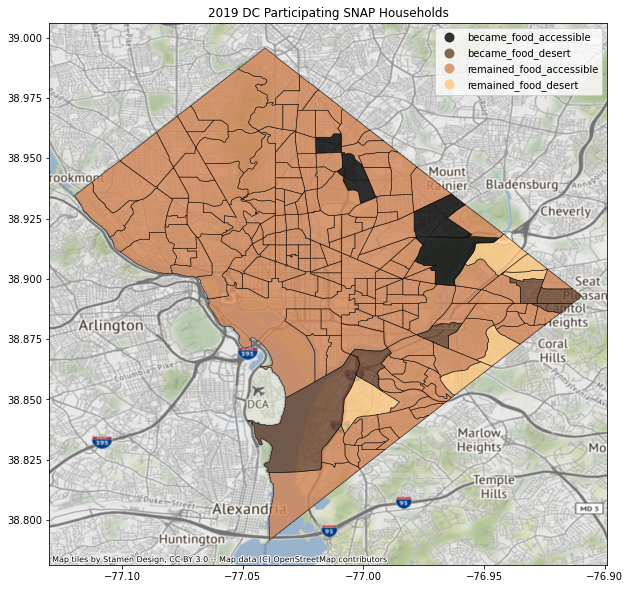

In [92]:
# ERROR
food_desert_map = dc_all_2019_1and10.plot(
    figsize=(10, 10),
    alpha=0.8,
    column='food_desert_status',
    cmap='copper',
    edgecolor='black', 
    linewidth = 0.6,
    label = True,
    categorical = True,
    legend = True
)
plt.title('2019 DC Participating SNAP Households')
cx.add_basemap(food_desert_map, crs = dc_all_2019_1and10.crs);

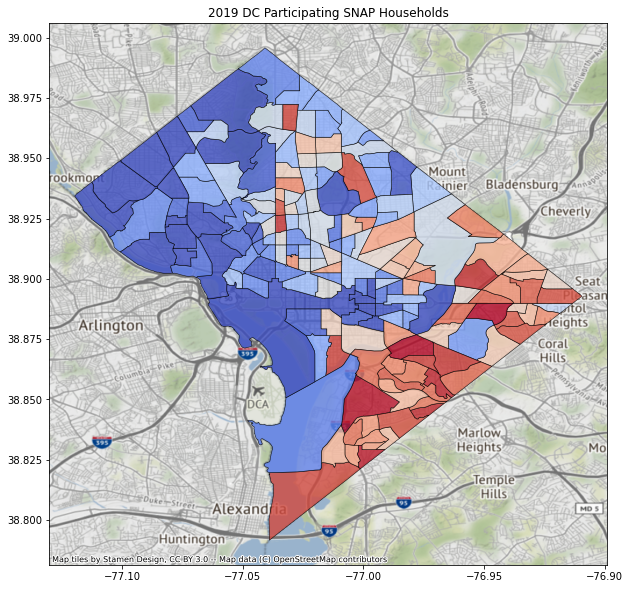

In [94]:
snap_households = dc_all_2019.plot(
    figsize=(10, 10),
    alpha=0.8,
    column="tractsnap",
    cmap='coolwarm',
    edgecolor='black', 
    linewidth = 0.6,
    label = True,
    categorical = True,

)
plt.title('2019 DC Participating SNAP Households')
cx.add_basemap(snap_households, crs = dc_all_2019.crs);

In [80]:
dc_all_2019.columns[:100]

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'censustract', 'state', 'county', 'urban', 'pop2010', 'ohu2010',
       'groupquartersflag', 'numgqtrs', 'pctgqtrs', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'hunvflag', 'lowincometracts', 'povertyrate', 'medianfamilyincome',
       'la1and10', 'lahalfand10', 'la1and20', 'latracts_half', 'latracts1',
       'latracts10', 'latracts20', 'latractsvehicle_20', 'lapop1_10',
       'lapop05_10', 'lapop1_20', 'lalowi1_10', 'lalowi05_10', 'lalowi1_20',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare',
       'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare',
       'laaianhalf', 'laai

In [95]:
tooltip_column = ['povertyrate', 'medianfamilyincome']

dc_all_2019.explore(
    column='tractsnap',
    tiles='OpenStreetMap', 
    cmap='copper',
    legend = True,
    tooltip = tooltip_column,
    style_kwds={'weight':2, 'fillOpacity':.7}
)